In [1]:
import powerlaw  # For fitting and analyzing power-law distributions
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import networkx as nx  # For creating and manipulating complex networks

# Define a theoretical power-law distribution with minimum value (xmin) of 5.0 and exponent (alpha) of 2.5
theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])

# Generate 50,000 random data points following the defined theoretical power-law distribution
simulated_data = theoretical_distribution.generate_random(10000)

# Fit the generated data to a power-law distribution to analyze its characteristics
fit = powerlaw.Fit(simulated_data)

# Print the estimated exponent (gamma) of the fitted power-law distribution, formatted to two decimal places
print("Gamma of powerlaw distribution is %0.2f" % fit.power_law.alpha)

Calculating best minimal value for power law fit
Gamma of powerlaw distribution is 2.50


In [7]:
import networkx as nx
import numpy as np
import powerlaw
import matplotlib.pyplot as plt

# Function to generate power-law distributed degree sequence
def generate_power_law_sequence(num_nodes, gamma):
    degree_sequence = powerlaw.Power_Law(xmin=1, parameters=[gamma]).generate_random(num_nodes)
    degree_sequence = np.round(degree_sequence).astype(int)
    # Adjust the number of nodes to make the sum of degrees even
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[np.random.randint(0, num_nodes)] += 1
    return degree_sequence

# Function to create a network with a given degree sequence
def create_network_from_degree_sequence(degree_sequence):
    G = nx.configuration_model(degree_sequence)
    G = nx.Graph(G)  # Remove parallel edges and self-loops
    return G

# Number of nodes for each network
num_nodes = 500

# Anomalous Regime Network (γ < 2)
gamma_anomalous = 1.5
degree_sequence_anomalous = generate_power_law_sequence(num_nodes, gamma_anomalous)
anomalous_network = create_network_from_degree_sequence(degree_sequence_anomalous)

# Scale-Free Regime Network (2 <= γ <= 3)
gamma_scale_free = 2.5
degree_sequence_scale_free = generate_power_law_sequence(num_nodes, gamma_scale_free)
scale_free_network = create_network_from_degree_sequence(degree_sequence_scale_free)

# Random Regime Network (γ > 3)
gamma_random = 4.5
degree_sequence_random = generate_power_law_sequence(num_nodes, gamma_random)
random_network = create_network_from_degree_sequence(degree_sequence_random)

In [55]:
# redfining as for previous value got short degree range b/w 0 to 4, could not make much sense out of the plots
# Random Regime Network (γ > 3) 
gamma_random = 4
degree_sequence_random = generate_power_law_sequence(num_nodes, gamma_random)
random_network = create_network_from_degree_sequence(degree_sequence_random)

In [56]:
# Find the degree range of the anomalous regime network
degree_anomalous = sorted([d for n, d in anomalous_network.degree()])
print("Degree range of the Anomalous Regime Network:", degree_anomalous[0], degree_anomalous[-1])

# Find the degree range of the scale-free regime network
degree_scale_free = sorted([d for n, d in scale_free_network.degree()])
print("Degree range of the Scale-Free Regime Network:", degree_scale_free[0], degree_scale_free[-1])

# Find the degree range of the random regime network
degree_random = sorted([d for n, d in random_network.degree()])
print("Degree range of the Random Regime Network:", degree_random[0], degree_random[-1])


Degree range of the Anomalous Regime Network: 1 307
Degree range of the Scale-Free Regime Network: 1 41
Degree range of the Random Regime Network: 1 15


In [65]:
anomalous_network.number_of_edges(),scale_free_network.number_of_edges(),random_network.number_of_edges()

(2842, 623, 381)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_17784\2249087411.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Degree')
C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_17784\2249087411.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


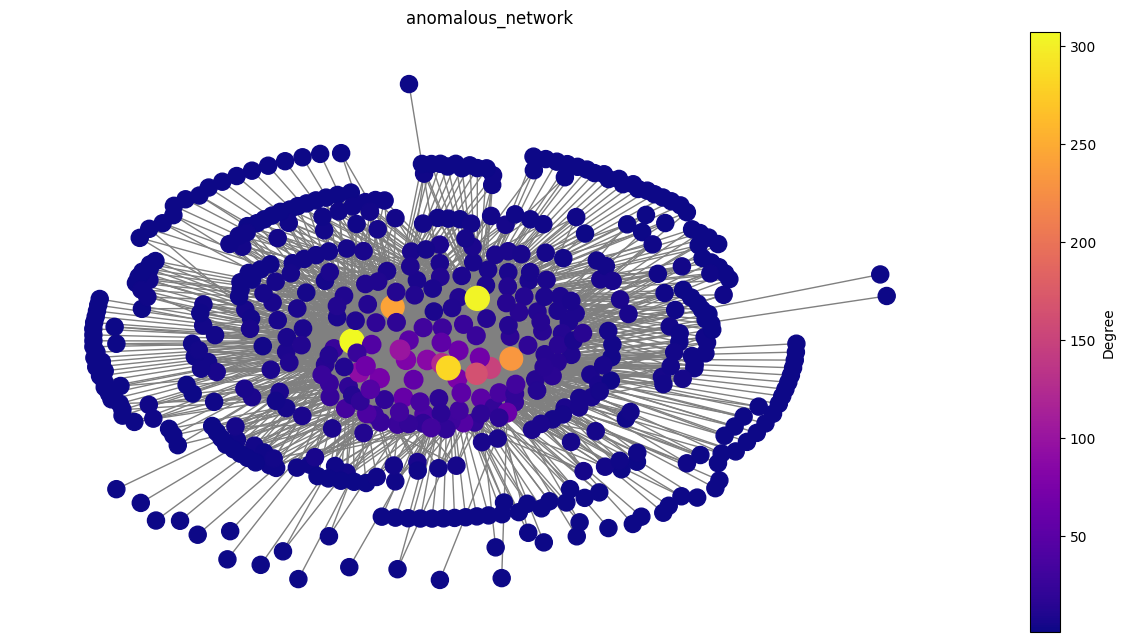

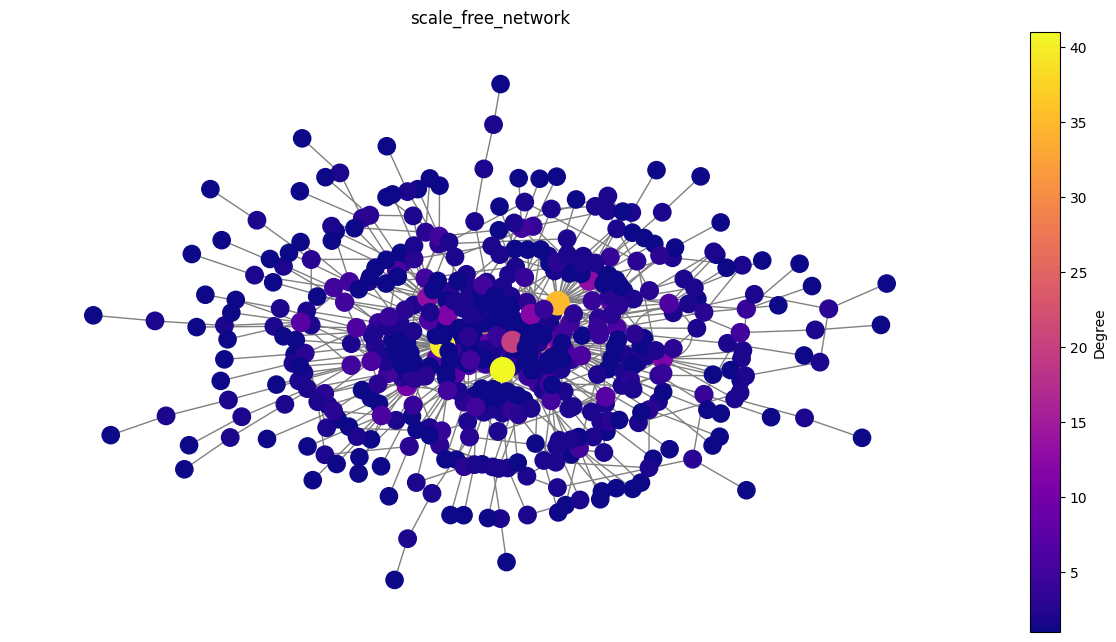

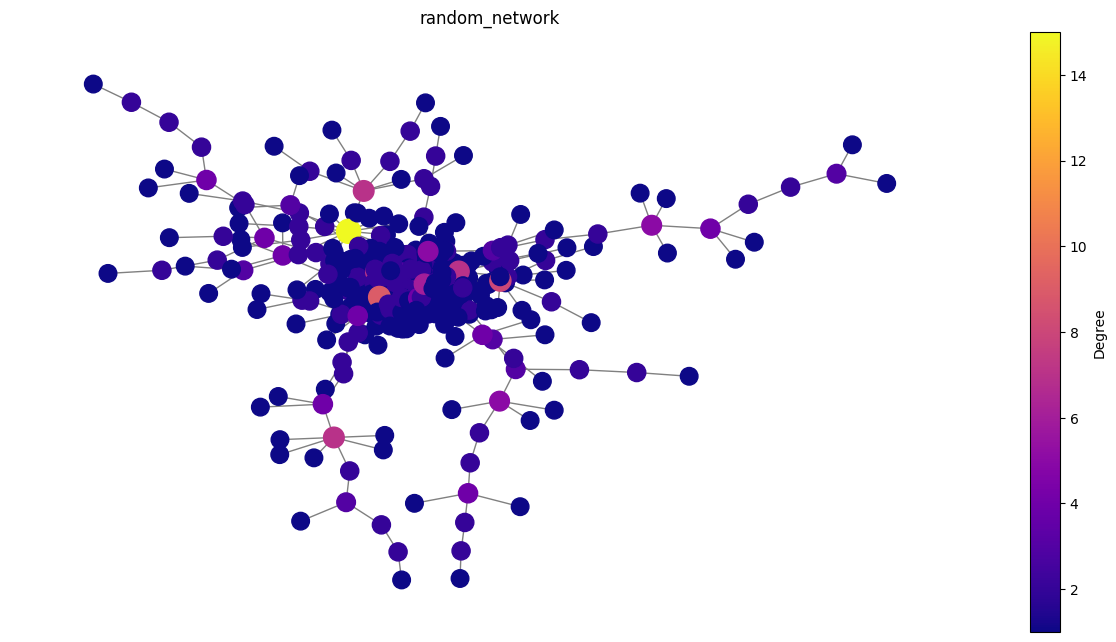

In [68]:
def draw_network(G, title):
    degrees = dict(nx.degree(G))
    min_degree = min(degrees.values())
    max_degree = max(degrees.values())

    def size(v):
        return 5*(v+max_degree)/max_degree

    node_sizes = [size(v) * 30 for v in degrees.values()]
    
    plt.figure(figsize=(12, 6))
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, nodelist=list(degrees.keys()), node_size=node_sizes,
            node_color=[v for v in degrees.values()], cmap=plt.cm.plasma,
            with_labels=False, edge_color='gray')
    plt.title(title)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min_degree, vmax=max_degree))
    sm.set_array([])
    plt.colorbar(sm, label='Degree')
    plt.tight_layout()
    plt.show()

draw_network(anomalous_network, "anomalous_network")
draw_network(scale_free_network, "scale_free_network")
draw_network(random_network, "random_network")

Text(0.5, 1.0, 'Random Regime Network')

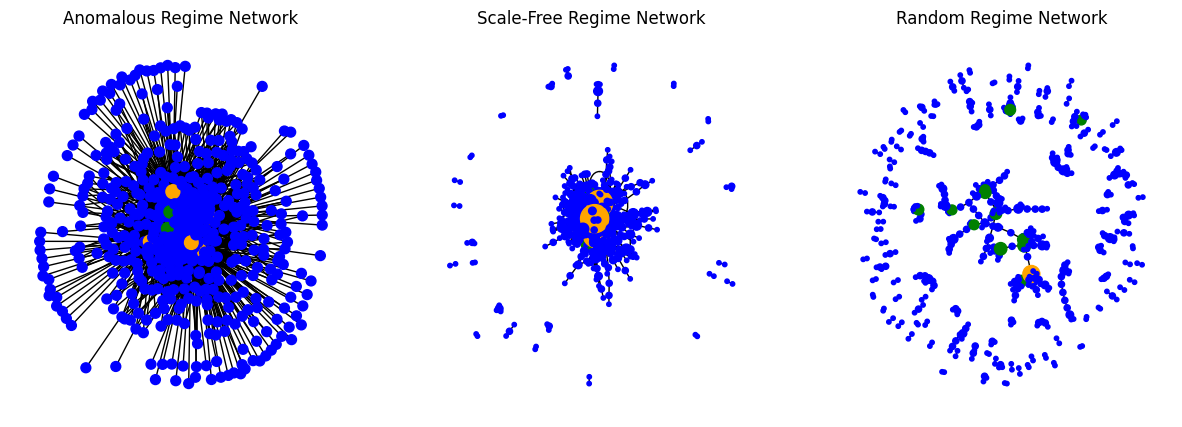

In [58]:
# Function to assign colors to nodes based on their degree ranges
def assign_colors_based_on_degree(G):
    degrees = dict(G.degree())
    max_degree = max(degrees.values())
    # Define degree ranges and corresponding colors
    degree_ranges = [0, max_degree // 3, 2 * max_degree // 3, max_degree + 1]
    colors = ['blue', 'green', 'orange', 'red']  # Blue for low, green for medium, orange for high, red for very high
    color_map = []
    for node in G.nodes():
        degree = degrees[node]
        # Find the degree range for the node
        for i in range(len(degree_ranges) - 1):
            if degree >= degree_ranges[i] and degree < degree_ranges[i + 1]:
                color_map.append(colors[i])
                break
    return color_map

plt.figure(figsize=(15, 5))

color_map_anomalous = assign_colors_based_on_degree(anomalous_network)
color_map_scale_free = assign_colors_based_on_degree(scale_free_network)
color_map_random = assign_colors_based_on_degree(random_network)

max_degree = 1
def size(v):
    return 5*(v+max_degree)/max_degree

max_degree = max(dict(nx.degree(anomalous_network)).values())
plt.subplot(131)
pos_anomalous = nx.spring_layout(anomalous_network)
nx.draw(anomalous_network, pos_anomalous, node_color=color_map_anomalous, node_size=[size(v)*10 for v in dict(anomalous_network.degree()).values()], with_labels=False)
plt.title("Anomalous Regime Network")

plt.subplot(132)
pos_scale_free = nx.spring_layout(scale_free_network)
nx.draw(scale_free_network, pos_scale_free, node_color=color_map_scale_free, node_size=[v * 10 for v in dict(scale_free_network.degree()).values()], with_labels=False)
plt.title("Scale-Free Regime Network")

plt.subplot(133)
pos_random = nx.spring_layout(random_network)
nx.draw(random_network, pos_random, node_color=color_map_random, node_size=[v * 10 for v in dict(random_network.degree()).values()], with_labels=False)
plt.title("Random Regime Network")

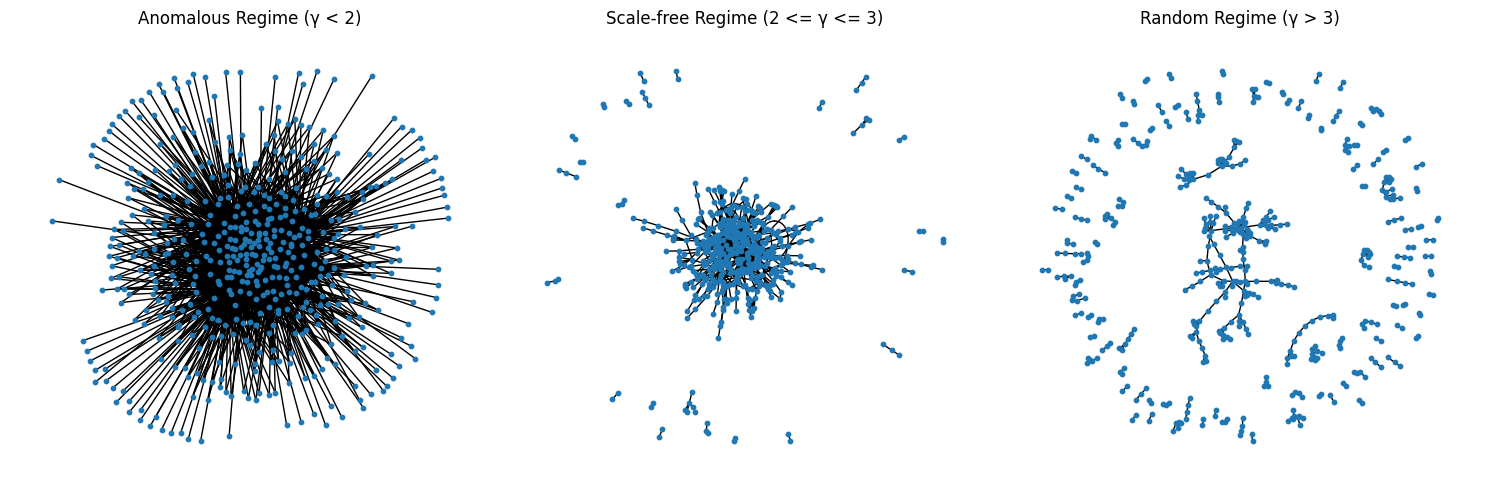

In [60]:
plt.figure(figsize=(15, 5))

# Plot Anomalous regime network
plt.subplot(1, 3, 1)
plt.title("Anomalous Regime (γ < 2)")
# pos = nx.spring_layout(anomalous_network)
nx.draw(anomalous_network, node_size=10)

# Plot Scale-free regime network
plt.subplot(1, 3, 2)
plt.title("Scale-free Regime (2 <= γ <= 3)")
nx.draw(scale_free_network, node_size=10)

# Plot Random regime network
plt.subplot(1, 3, 3)
plt.title("Random Regime (γ > 3)")
nx.draw(random_network, node_size=10)

plt.tight_layout()
plt.show()

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_17784\3974941366.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  axs[i*2].plot(degrees_range, degree_counts, 'bo-', markersize=5, markerfacecolor='blue', color='white')
C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_17784\3974941366.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  axs[i*2+1].loglog(degrees_range, degree_counts, 'ro-', markersize=5, markerfacecolor='red', color='white')


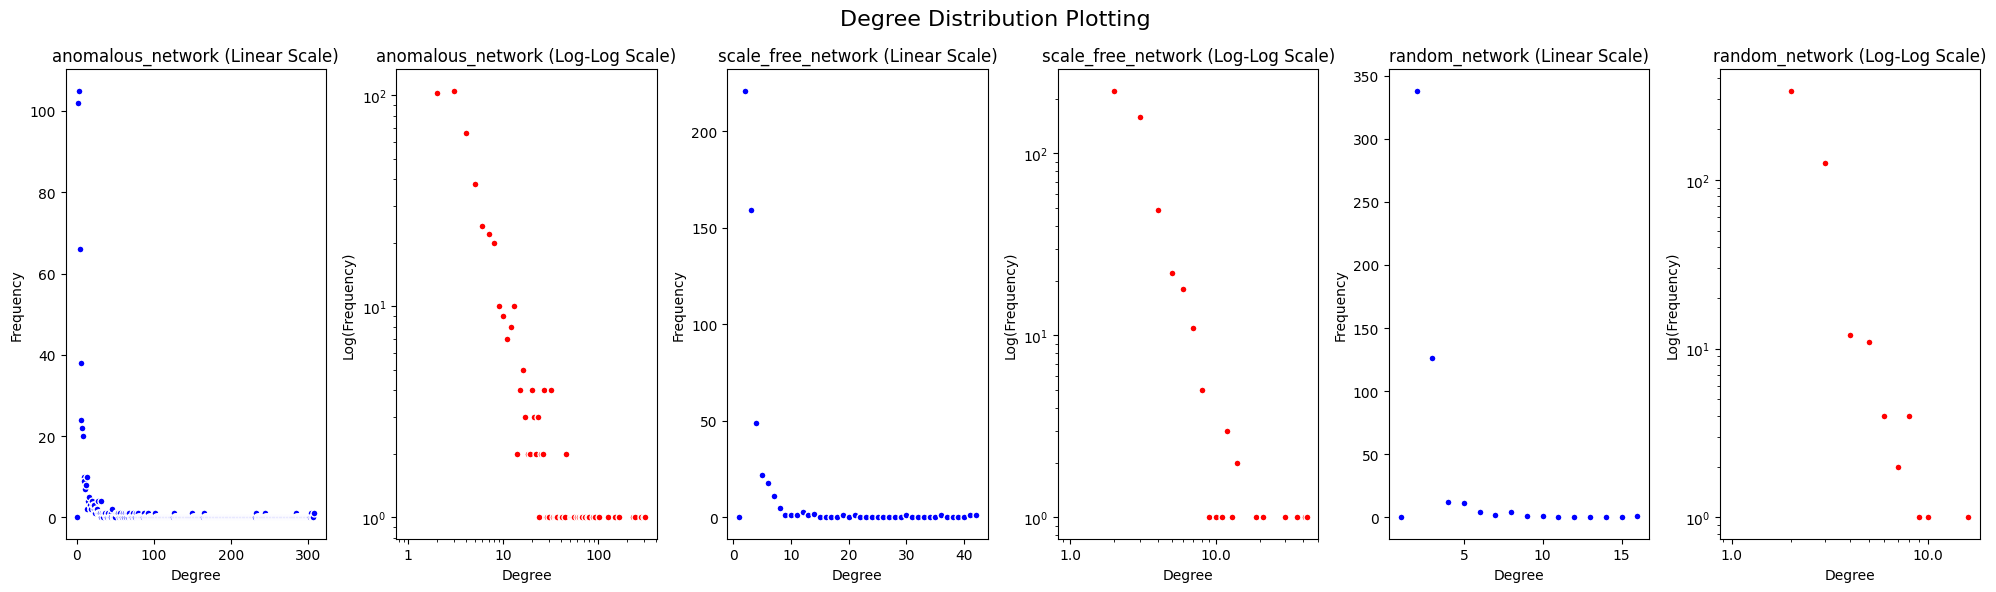

In [63]:
from matplotlib.ticker import ScalarFormatter

# Function to plot degree distribution
def plot_degree_distribution(networks, titles):
    fig, axs = plt.subplots(1, 6, figsize=(20, 6))

    for i, (G, title) in enumerate(zip(networks, titles)):
        degrees = [G.degree(node) for node in G.nodes()]
        degree_counts = nx.degree_histogram(G)
        degrees_range = range(1, len(degree_counts) + 1)  # Consider degrees from 1 to len(degree_counts)
        
        # Plot degree distribution on linear scale
        axs[i*2].plot(degrees_range, degree_counts, 'bo-', markersize=5, markerfacecolor='blue', color='white')
        axs[i*2].set_title(title + ' (Linear Scale)')
        axs[i*2].set_xlabel('Degree')
        axs[i*2].set_ylabel('Frequency')

        axs[i*2+1].loglog(degrees_range, degree_counts, 'ro-', markersize=5, markerfacecolor='red', color='white')
        axs[i*2+1].set_title(title + ' (Log-Log Scale)')
        axs[i*2+1].set_xlabel('Degree')
        axs[i*2+1].set_ylabel('Log(Frequency)')
        axs[i*2+1].xaxis.set_major_formatter(ScalarFormatter(useMathText=False)) 

    fig.suptitle('Degree Distribution Plotting', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot degree distribution for each network
plot_degree_distribution([anomalous_network, scale_free_network, random_network], 
                             ['anomalous_network', 'scale_free_network', 'random_network'])


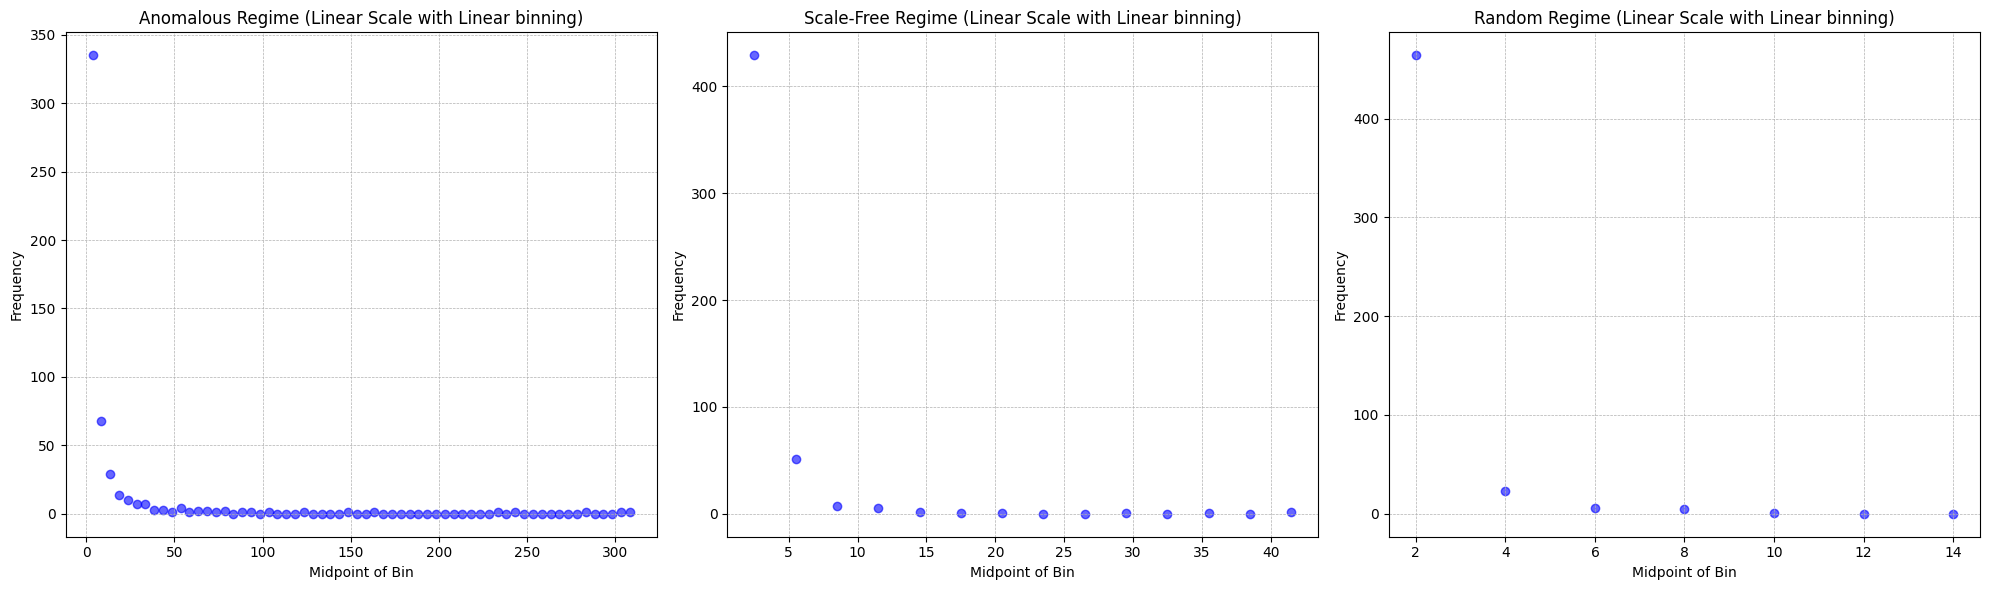

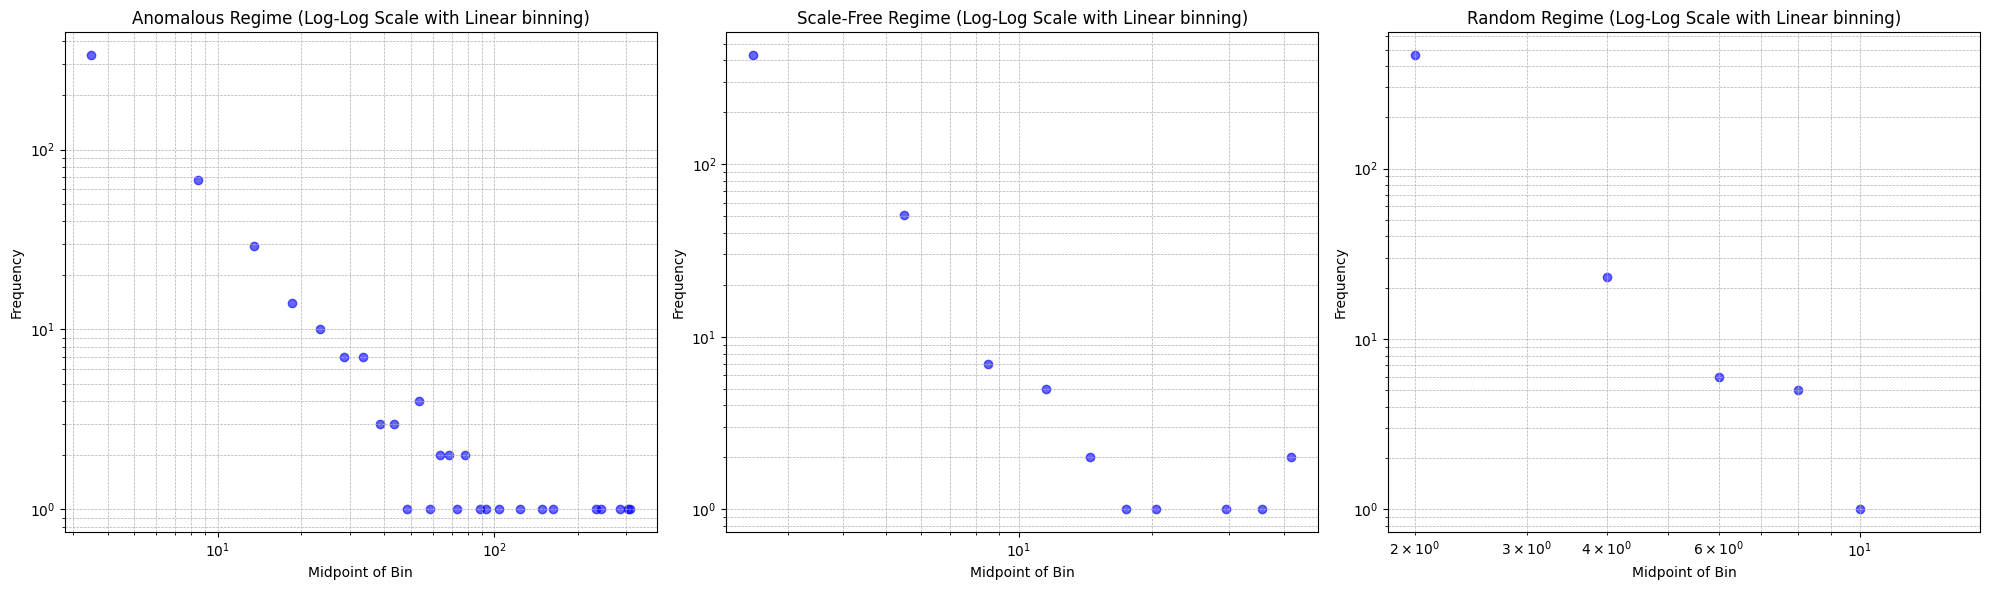

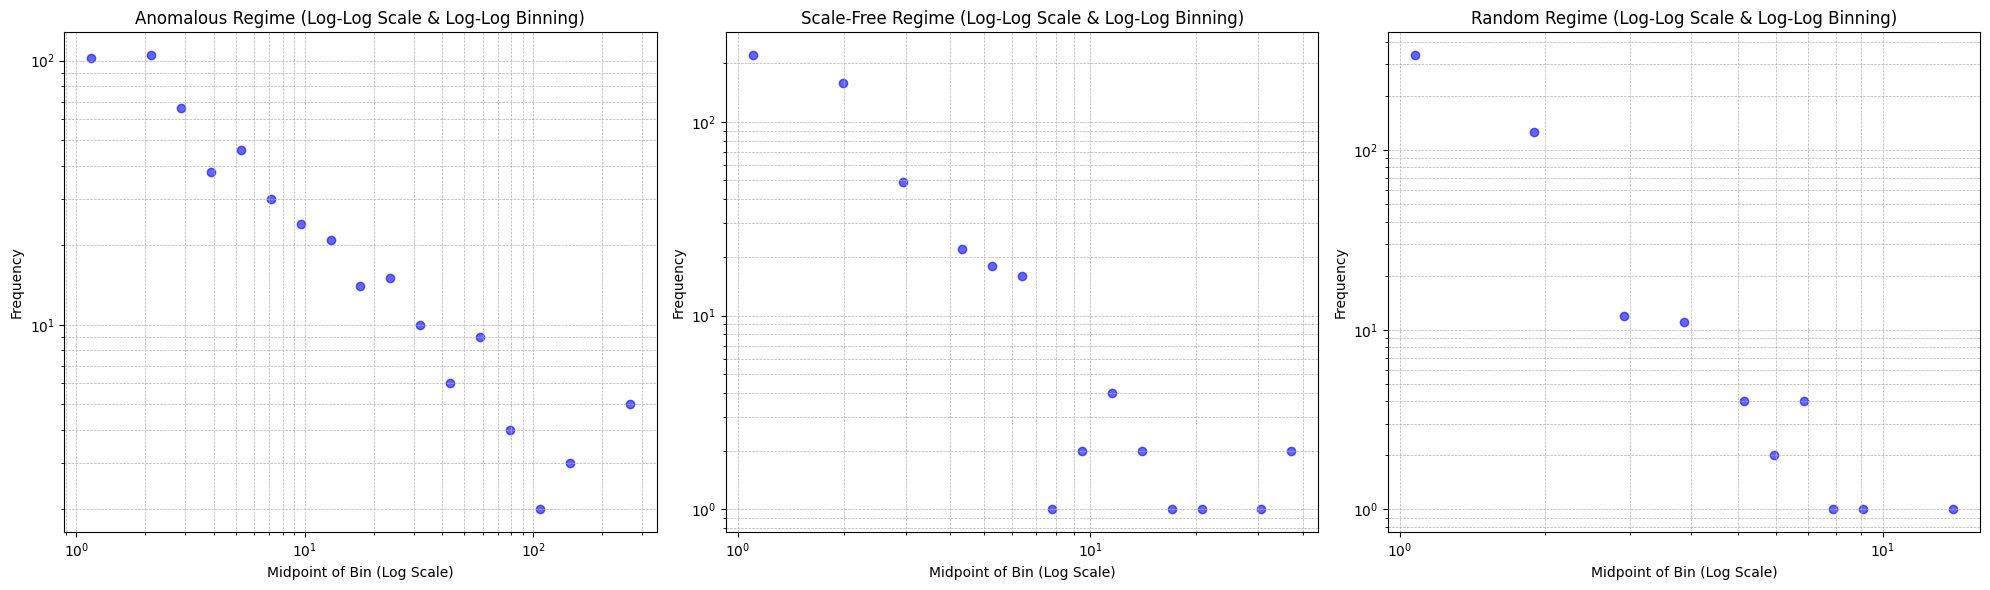

In [75]:
def plot_degree_distribution_linscale_linbins(networks, titles):
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for i, (G, title) in enumerate(zip(networks, titles)):
        degrees = [G.degree(node) for node in G.nodes()]
        
        # Determine bin size based on the network type
        if 'Anomalous' in title:
            bin_size = 5
        elif 'Scale-Free' in title:
            bin_size = 3
        else:  # Random Regime
            bin_size = 2
        
        # Calculate the edges of bins
        bin_edges = np.arange(start=np.floor(min(degrees)),
                              stop=np.ceil(max(degrees)) + bin_size,
                              step=bin_size)
        
        # Classify data points into corresponding bins
        bin_indices = np.digitize(degrees, bins=bin_edges)
        
        # Calculate frequencies
        bin_counts = np.bincount(bin_indices)[1:]
        
        # Calculate the midpoint for each bin
        mid_points = bin_edges[:-1] + bin_size / 2
        
        # Ensure the sizes of mid_points and bin_counts match
        min_size = min(len(mid_points), len(bin_counts))
        mid_points = mid_points[:min_size]
        bin_counts = bin_counts[:min_size]
        
        # Scatter plot with linear scale
        axs[i].scatter(mid_points, bin_counts, color='blue', alpha=0.6)
        axs[i].set_xlabel('Midpoint of Bin')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(title + ' (Linear Scale with Linear binning)')
        axs[i].grid(True, which="both", ls="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

def plot_degree_distribution_logscale_linbins(networks, titles):
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for i, (G, title) in enumerate(zip(networks, titles)):
        degrees = [G.degree(node) for node in G.nodes()]
        
        # Determine bin size based on the network type
        if 'Anomalous' in title:
            bin_size = 5
        elif 'Scale-Free' in title:
            bin_size = 3
        else:  # Random Regime
            bin_size = 2
        
        # Calculate the edges of bins
        bin_edges = np.arange(start=np.floor(min(degrees)),
                              stop=np.ceil(max(degrees)) + bin_size,
                              step=bin_size)
        
        # Classify data points into corresponding bins
        bin_indices = np.digitize(degrees, bins=bin_edges)
        
        # Calculate frequencies
        bin_counts = np.bincount(bin_indices)[1:]
        
        # Calculate the midpoint for each bin
        mid_points = bin_edges[:-1] + bin_size / 2
        
        # Ensure the sizes of mid_points and bin_counts match
        min_size = min(len(mid_points), len(bin_counts))
        mid_points = mid_points[:min_size]
        bin_counts = bin_counts[:min_size]
        
        # Scatter plot with log-log scale
        axs[i].scatter(mid_points, bin_counts, color='blue', alpha=0.6)
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].set_xlabel('Midpoint of Bin')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(title + ' (Log-Log Scale with Linear binning)')
        axs[i].grid(True, which="both", ls="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

def plot_degree_distribution_log_binning(networks, titles):
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for i, (G, title) in enumerate(zip(networks, titles)):
        degrees = [G.degree(node) for node in G.nodes()]
        
        # Determine appropriate bin size based on the degree range of the network
        if 'Anomalous' in title:
            bin_size = 5
        elif 'Scale-Free' in title:
            bin_size = 10
        else:  # Random Regime
            bin_size = 15
        
        # Define log bin edges using base 10 logarithm
        max_degree = max(degrees)
        bin_edges = np.logspace(start=0, stop=np.log10(max_degree), num=20, base=10)

        # Calculate histogram
        hist, edges = np.histogram(degrees, bins=bin_edges)

        # Calculate midpoints for scatter plot
        mid_points = np.sqrt(edges[:-1] * edges[1:])

        # Scatter plot with log-log scale
        axs[i].scatter(mid_points, hist, color='blue', alpha=0.6)
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].set_xlabel('Midpoint of Bin (Log Scale)')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(title + ' (Log-Log Scale & Log-Log Binning)')
        axs[i].grid(True, which="both", ls="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

# Plot the degree distribution for each network
networks = [anomalous_network, scale_free_network, random_network]
titles = ['Anomalous Regime', 'Scale-Free Regime', 'Random Regime']
plot_degree_distribution_linscale_linbins(networks, titles)
plot_degree_distribution_logscale_linbins(networks, titles)
plot_degree_distribution_log_binning(networks, titles)


In [85]:
# Perform Kolmogorov-Smirnov test
ks_statistic_anomalous, p_value_anomalous = kstest(degree_anomalous, 'expon')
ks_statistic_scale_free, p_value_scale_free = kstest(degree_scale_free, 'expon')
ks_statistic_random, p_value_random = kstest(degree_random, 'expon')

# Interpret findings
print("Kolmogorov-Smirnov Test Results:")
print("Anomalous Regime:")
print("KS Statistic:", ks_statistic_anomalous)
print("p-value:", p_value_anomalous)
if p_value_anomalous < 0.05:
    print("The empirical degree distribution in the anomalous regime is significantly different from an exponential distribution.")
else:
    print("The empirical degree distribution in the anomalous regime is consistent with an exponential distribution.")

print("Scale-Free Regime:")
print("KS Statistic:", ks_statistic_scale_free)
print("p-value:", p_value_scale_free)
if p_value_scale_free < 0.05:
    print("The empirical degree distribution in the scale-free regime is significantly different from an exponential distribution.")
else:
    print("The empirical degree distribution in the scale-free regime is consistent with an exponential distribution.")

print("Random Regime:")
print("KS Statistic:", ks_statistic_random)
print("p-value:", p_value_random)
if p_value_random < 0.05:
    print("The empirical degree distribution in the random regime is significantly different from an exponential distribution.")
else:
    print("The empirical degree distribution in the random regime is consistent with an exponential distribution.")


Kolmogorov-Smirnov Test Results:
Anomalous Regime:
KS Statistic: 0.6606647167633873
p-value: 8.117924081833238e-215
The empirical degree distribution in the anomalous regime is significantly different from an exponential distribution.
Scale-Free Regime:
KS Statistic: 0.6321205588285577
p-value: 3.9043908921314087e-194
The empirical degree distribution in the scale-free regime is significantly different from an exponential distribution.
Random Regime:
KS Statistic: 0.6321205588285577
p-value: 3.9043908921314087e-194
The empirical degree distribution in the random regime is significantly different from an exponential distribution.


In [84]:
from scipy.stats import kstest, poisson

# Perform Kolmogorov-Smirnov test for Poisson distribution
ks_statistic_anomalous, p_value_anomalous = kstest(degree_anomalous, 'poisson', args=(degree_anomalous,))
ks_statistic_scale_free, p_value_scale_free = kstest(degree_scale_free, 'poisson', args=(degree_scale_free,))
ks_statistic_random, p_value_random = kstest(degree_random, 'poisson', args=(degree_random,))

# Interpret findings
print("Poisson Distribution Test Results:")
print("Anomalous Regime:")
print("KS Statistic:", ks_statistic_anomalous)
print("p-value:", p_value_anomalous)
if p_value_anomalous < 0.05:
    print("The empirical degree distribution in the anomalous regime is significantly different from a Poisson distribution.")
else:
    print("The empirical degree distribution in the anomalous regime is consistent with a Poisson distribution.")

print("Scale-Free Regime:")
print("KS Statistic:", ks_statistic_scale_free)
print("p-value:", p_value_scale_free)
if p_value_scale_free < 0.05:
    print("The empirical degree distribution in the scale-free regime is significantly different from a Poisson distribution.")
else:
    print("The empirical degree distribution in the scale-free regime is consistent with a Poisson distribution.")

print("Random Regime:")
print("KS Statistic:", ks_statistic_random)
print("p-value:", p_value_random)
if p_value_random < 0.05:
    print("The empirical degree distribution in the random regime is significantly different from a Poisson distribution.")
else:
    print("The empirical degree distribution in the random regime is consistent with a Poisson distribution.")


Poisson Distribution Test Results:
Anomalous Regime:
KS Statistic: 0.7357588823428847
p-value: 8.562382697155511e-278
The empirical degree distribution in the anomalous regime is significantly different from a Poisson distribution.
Scale-Free Regime:
KS Statistic: 0.7357588823428847
p-value: 8.562382697155511e-278
The empirical degree distribution in the scale-free regime is significantly different from a Poisson distribution.
Random Regime:
KS Statistic: 0.7357588823428847
p-value: 8.562382697155511e-278
The empirical degree distribution in the random regime is significantly different from a Poisson distribution.


c:\Users\Yashraj Deshmukh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:7940: RuntimeWarning: overflow encountered in divide
  return (shape - 1) * np.sum(1 / (loc - data))  # -1/(data-loc)
c:\Users\Yashraj Deshmukh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Yashraj Deshmukh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


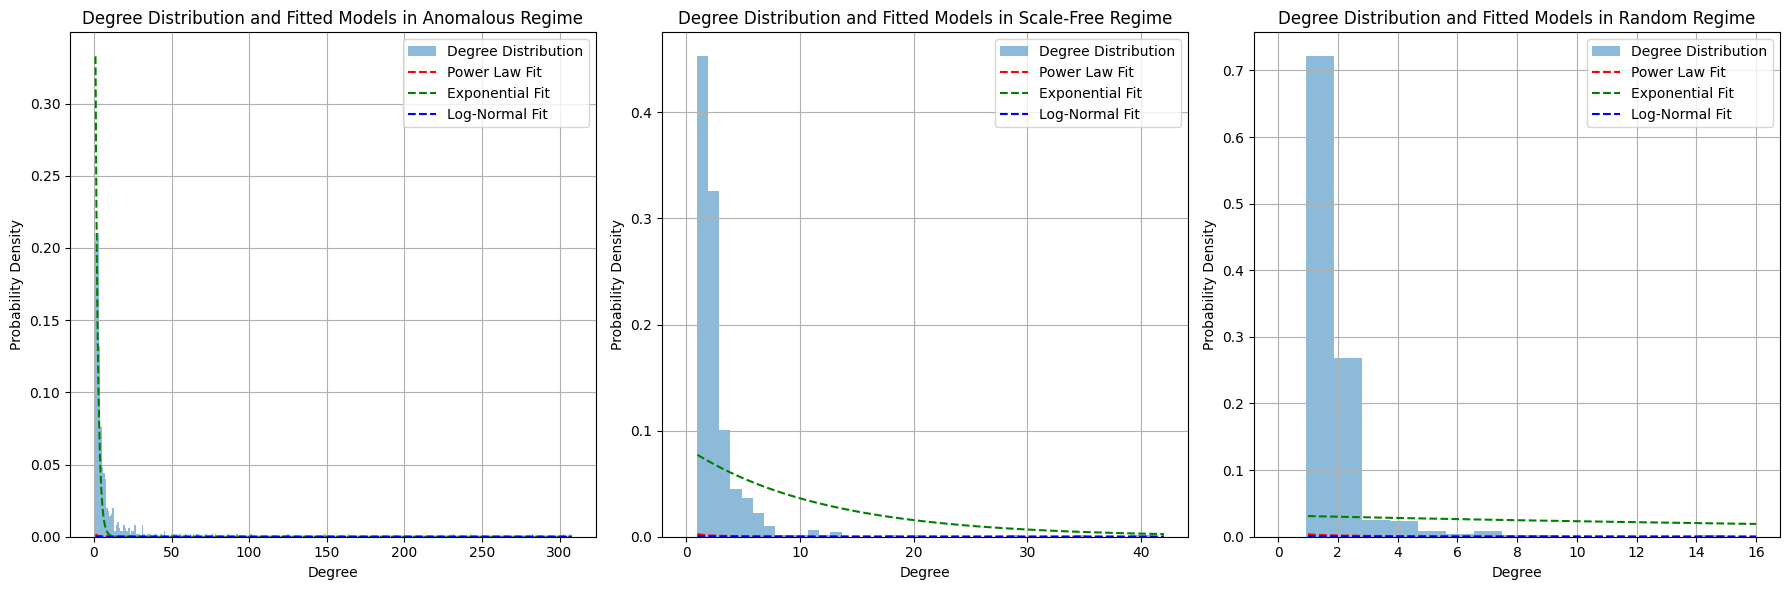

Summary Statistics for Anomalous Regime:
Mean: 1.6233766233766234
Median: 0.0
Standard Deviation: 9.610990679694149

Goodness-of-Fit Measures for Anomalous Regime:
Power Law - KS Statistic: 0.5122967504541973
Exponential - KS Statistic: 0.7987012987012987
Log-Normal - KS Statistic: 0.49087721171105425

Summary Statistics for Scale-Free Regime:
Mean: 11.904761904761905
Median: 0.0
Standard Deviation: 41.27365672228504

Goodness-of-Fit Measures for Scale-Free Regime:
Power Law - KS Statistic: 0.43872897219845197
Exponential - KS Statistic: 0.7051455418094104
Log-Normal - KS Statistic: 0.3659145273770767

Summary Statistics for Random Regime:
Mean: 31.25
Median: 1.0
Standard Deviation: 84.7050028038486

Goodness-of-Fit Measures for Random Regime:
Power Law - KS Statistic: 0.6036862201620449
Exponential - KS Statistic: 0.6298533791446439
Log-Normal - KS Statistic: 0.4041510215466182



In [64]:
from scipy.stats import powerlaw, expon, lognorm
from scipy.optimize import curve_fit
from scipy.stats import kstest

# Function to calculate degree distribution
def calculate_degree_distribution(G):
    degrees = dict(nx.degree(G))
    degree_values = list(degrees.values())
    degree_counts = np.bincount(degree_values)
    return degree_counts

# Function to fit power-law distribution
def fit_powerlaw(degree_counts):
    fit_params = powerlaw.fit(degree_counts, loc=0)
    return fit_params

# Function to fit exponential distribution
def fit_exponential(degree_counts):
    fit_params = expon.fit(degree_counts, loc=0)
    return fit_params

# Function to fit log-normal distribution
def fit_lognormal(degree_counts):
    fit_params = lognorm.fit(degree_counts, loc=0)
    return fit_params

# Generate degree distribution for each regime
degree_distributions = {
    'Anomalous': calculate_degree_distribution(anomalous_network),
    'Scale-Free': calculate_degree_distribution(scale_free_network),
    'Random': calculate_degree_distribution(random_network)
}

# Fit distributions to each degree distribution
distribution_fits = {}
for regime, degree_counts in degree_distributions.items():
    fit_powerlaw_params = fit_powerlaw(degree_counts)
    fit_exponential_params = fit_exponential(degree_counts)
    fit_lognormal_params = fit_lognormal(degree_counts)
    distribution_fits[regime] = {
        'Power Law': fit_powerlaw_params,
        'Exponential': fit_exponential_params,
        'Log-Normal': fit_lognormal_params
    }

# Visualize degree distributions and fitted models
plt.figure(figsize=(18, 6))

for i, (regime, degree_counts) in enumerate(degree_distributions.items(), start=1):
    plt.subplot(1, 3, i)
    plt.hist(np.arange(len(degree_counts)), bins=len(degree_counts), weights=degree_counts, density=True, alpha=0.5, label='Degree Distribution')
    
    # Plot fitted models
    x = np.linspace(1, len(degree_counts), 1000)
    plt.plot(x, powerlaw.pdf(x, *distribution_fits[regime]['Power Law']), linestyle='--', color='r', label='Power Law Fit')
    plt.plot(x, expon.pdf(x, *distribution_fits[regime]['Exponential']), linestyle='--', color='g', label='Exponential Fit')
    plt.plot(x, lognorm.pdf(x, *distribution_fits[regime]['Log-Normal']), linestyle='--', color='b', label='Log-Normal Fit')
    
    plt.title(f'Degree Distribution and Fitted Models in {regime} Regime')
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Output summary statistics and goodness-of-fit measures
for regime, degree_counts in degree_distributions.items():
    print(f"Summary Statistics for {regime} Regime:")
    print(f"Mean: {np.mean(degree_counts)}")
    print(f"Median: {np.median(degree_counts)}")
    print(f"Standard Deviation: {np.std(degree_counts)}")
    print()

    print(f"Goodness-of-Fit Measures for {regime} Regime:")
    print(f"Power Law - KS Statistic: {kstest(degree_counts, 'powerlaw', args=distribution_fits[regime]['Power Law'])[0]}")
    print(f"Exponential - KS Statistic: {kstest(degree_counts, 'expon', args=distribution_fits[regime]['Exponential'])[0]}")
    print(f"Log-Normal - KS Statistic: {kstest(degree_counts, 'lognorm', args=distribution_fits[regime]['Log-Normal'])[0]}")
    print()